In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import time as time
import random as random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv("278k_labelled_uri.csv")

In [ ]:
# Drop unnecessary columns
df_clean = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'uri'])
X = df_clean.drop(columns=['labels'])
y = df_clean['labels']

In [ ]:
#obtain a sample for visualisation
train, test = train_test_split(df, test_size=0.01 ,random_state=88)
df_sample = test

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2780 entries, 67856 to 127353
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      2780 non-null   int64  
 1   Unnamed: 0        2780 non-null   int64  
 2   duration (ms)     2780 non-null   float64
 3   danceability      2780 non-null   float64
 4   energy            2780 non-null   float64
 5   loudness          2780 non-null   float64
 6   speechiness       2780 non-null   float64
 7   acousticness      2780 non-null   float64
 8   instrumentalness  2780 non-null   float64
 9   liveness          2780 non-null   float64
 10  valence           2780 non-null   float64
 11  tempo             2780 non-null   float64
 12  spec_rate         2780 non-null   float64
 13  labels            2780 non-null   int64  
 14  uri               2780 non-null   object 
dtypes: float64(11), int64(3), object(1)
memory usage: 347.5+ KB


In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_test)

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [ ]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [ ]:
# Map labels
label_map = {0: "Calm", 1: "Sad", 2: "Energetic", 3: "Happy"}

In [ ]:
# DataFrame for predictions
plot_df = pd.DataFrame({
    "True Label": y_test.values,
    "Decision Tree": dt_preds,
    "KNN": knn_preds,
    "KMeans": kmeans_labels
}).replace(label_map)

<ipython-input-12-af2e72ce84f9>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-12-af2e72ce84f9>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-12-af2e72ce84f9>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




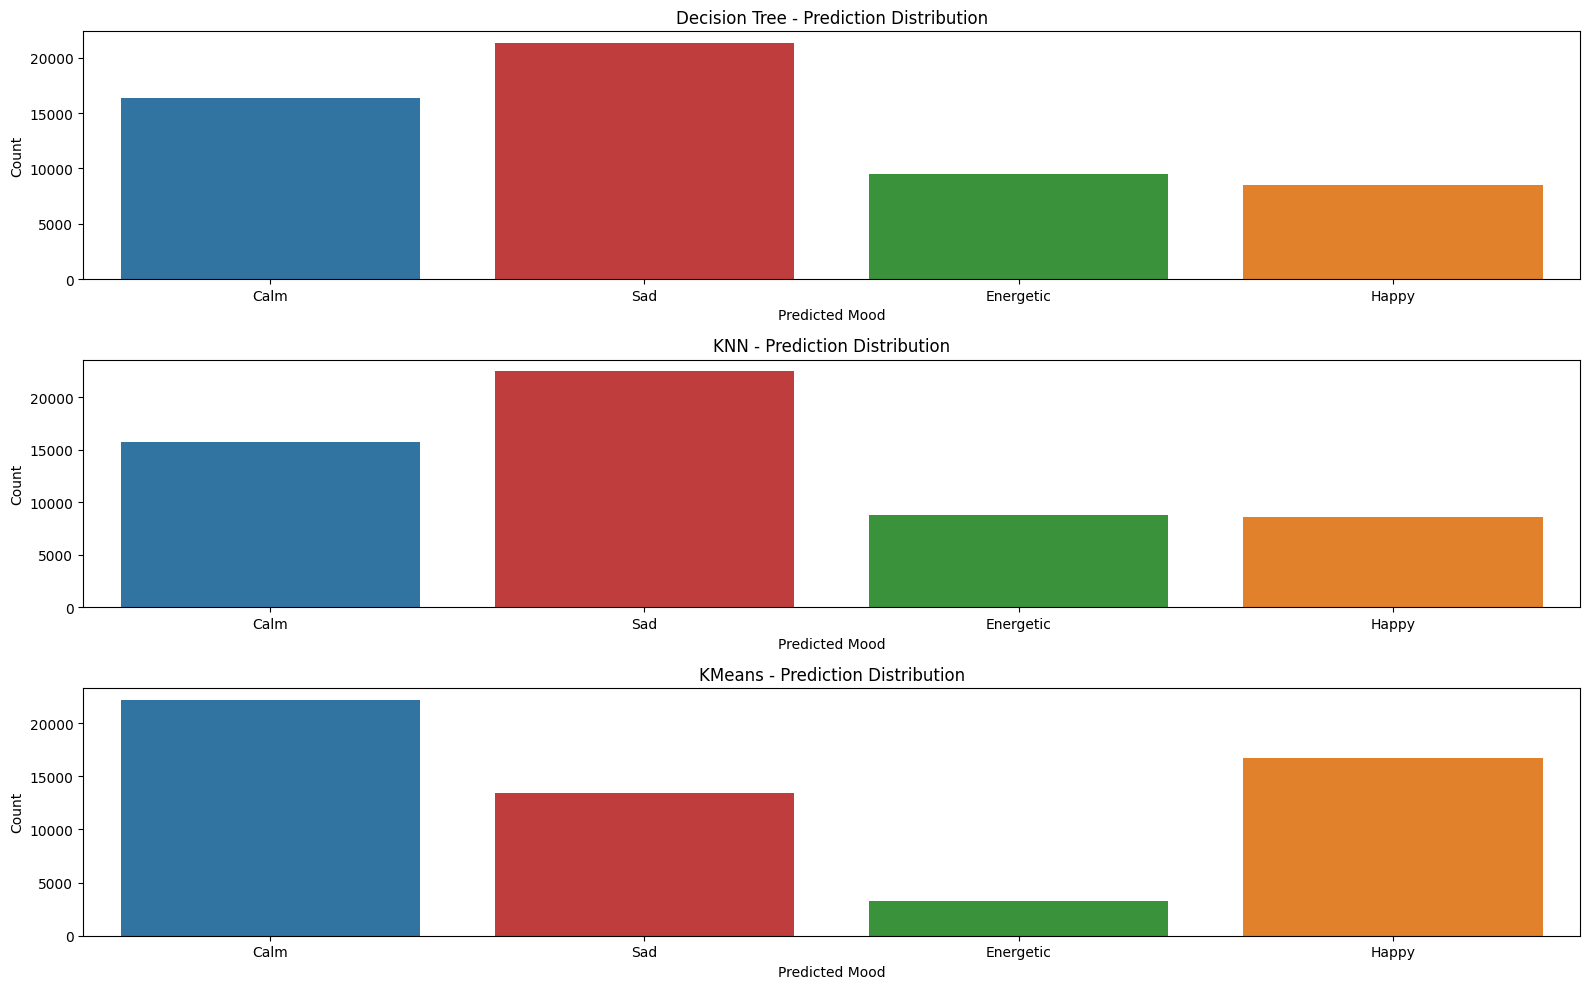

In [ ]:
# Define consistent mood color palette
mood_order = ["Calm", "Sad", "Energetic", "Happy"]
mood_colors = {
    "Calm": "#1f77b4",        # blue
    "Sad": "#d62728",         # red
    "Energetic": "#2ca02c",   # green
    "Happy": "#ff7f0e"        # orange
}

# Visualize predictions with consistent colors
plt.figure(figsize=(16, 10))
for idx, model in enumerate(["Decision Tree", "KNN", "KMeans"], 1):
    plt.subplot(3, 1, idx)
    sns.countplot(
        data=plot_df,
        x=model,
        order=mood_order,
        palette=mood_colors
    )
    plt.title(f"{model} - Prediction Distribution")
    plt.xlabel("Predicted Mood")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# Evaluation metrics
dt_acc = accuracy_score(y_test, dt_preds)
knn_acc = accuracy_score(y_test, knn_preds)
kmeans_acc = accuracy_score(y_test, kmeans_labels)

print("Model Accuracy Comparison:")
print("Decision Tree Accuracy:", dt_acc)
print("KNN Accuracy:", knn_acc)
print("KMeans Adjusted Accuracy:", kmeans_acc)

Model Accuracy Comparison:
Decision Tree Accuracy: 0.9081096639562496
KNN Accuracy: 0.851820536806505
KMeans Adjusted Accuracy: 0.11259624379362453


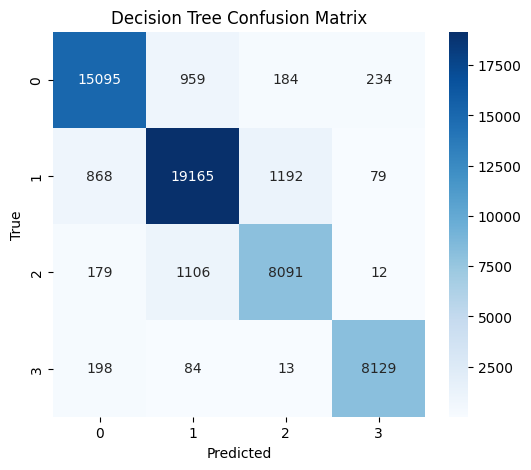

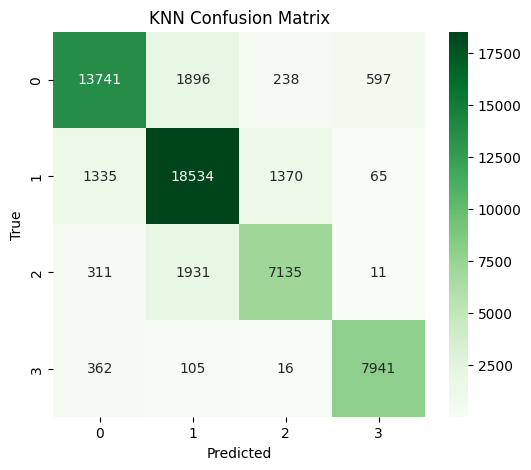

In [ ]:
# Confusion matrices
dt_cm = confusion_matrix(y_test, dt_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

knn_cm = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Feature importance from Decision Tree
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False)

In [ ]:
# Mood label map for boxplot
df_plot = df_clean.copy()
df_plot["labels"] = df_plot["labels"].map(label_map)

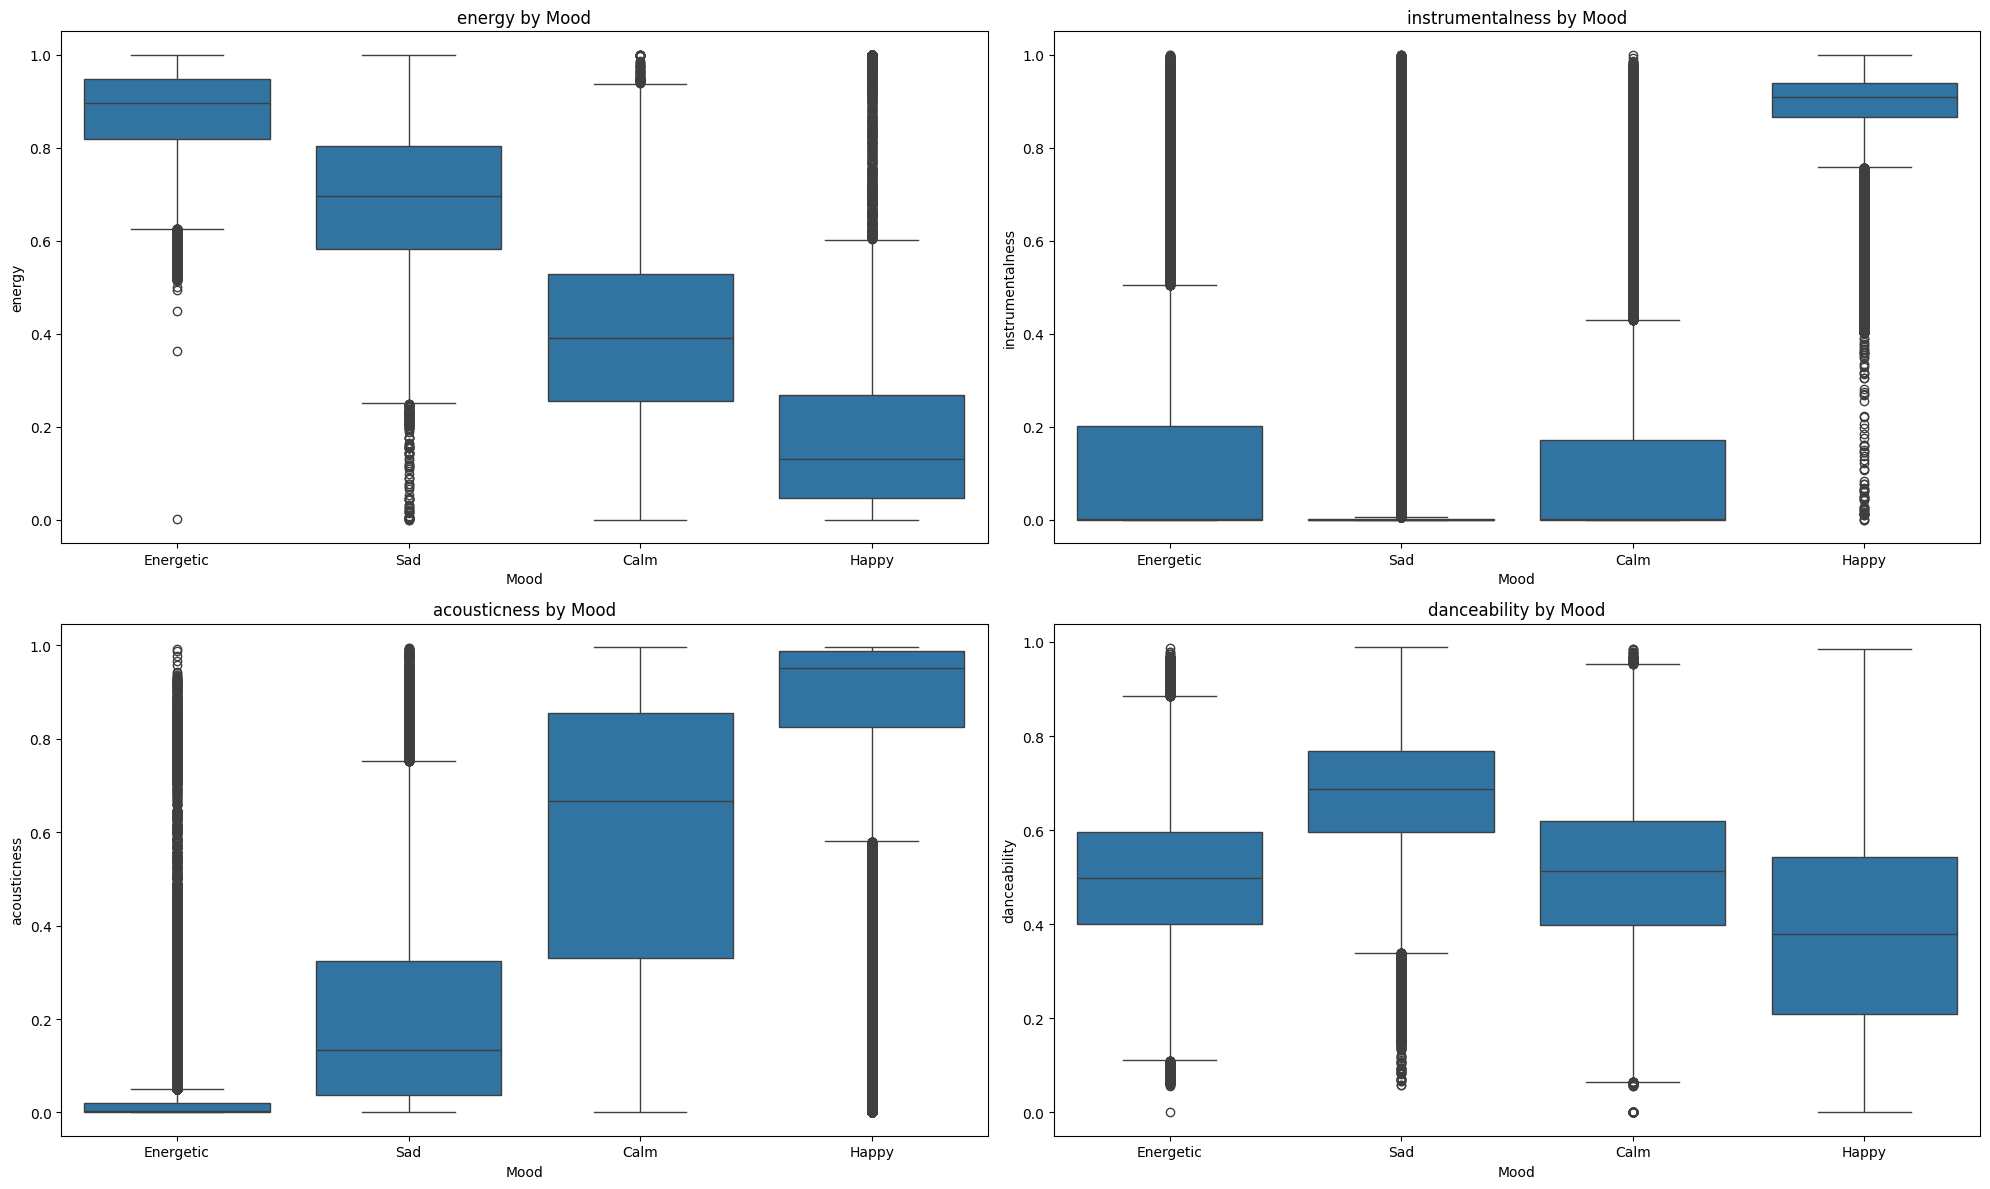

In [ ]:
# Top 4 features visualization
top_4_features = top_features.head(4).index.tolist()
plt.figure(figsize=(20, 12))
for i, feature in enumerate(top_4_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_plot, x="labels", y=feature)
    plt.title(f"{feature} by Mood")
    plt.xlabel("Mood")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Select energy-related features
energy_features = df[['energy', 'valence', 'tempo', 'danceability']]

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_energy = scaler.fit_transform(energy_features)

# Step 3: Apply KMeans clustering (3 clusters for energy levels)
kmeans_energy = KMeans(n_clusters=3, random_state=42, n_init=10)
energy_clusters = kmeans_energy.fit_predict(scaled_energy)

# Step 4: Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_energy)

# Step 5: Append clusters to the original DataFrame
df_clustered = df.copy()
df_clustered['Energy Cluster'] = energy_clusters

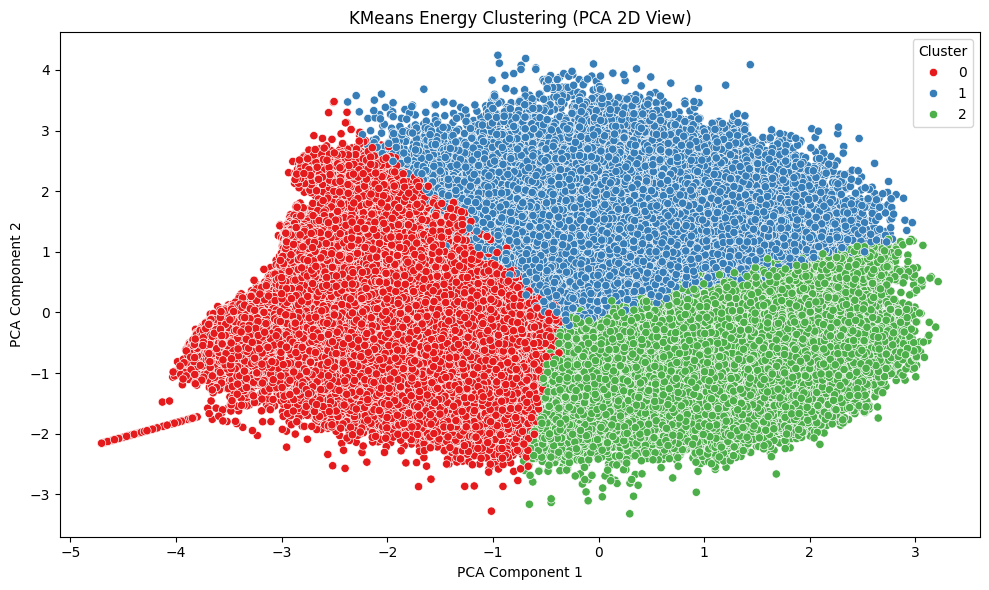

In [ ]:
# Step 6: Visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=energy_clusters, palette='Set1')
plt.title("KMeans Energy Clustering (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Step 7: Cluster-wise summary of average energy features
energy_summary = df_clustered.groupby('Energy Cluster')[['energy', 'valence', 'tempo', 'danceability']].mean()
print("Energy Cluster Summary:")
print(energy_summary)

Energy Cluster Summary:
                  energy   valence       tempo  danceability
Energy Cluster                                              
0               0.243388  0.200466   99.837546      0.390777
1               0.714629  0.394693  148.360876      0.499354
2               0.646241  0.644559  111.364903      0.691278


In [ ]:
# Step 8: Evaluate clustering accuracy using Adjusted Rand Index (if true labels are available)
if 'labels' in df.columns:
    true_labels = df['labels']
    ari_score = adjusted_rand_score(true_labels, energy_clusters)
    print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
else:
    print("No true 'labels' column found — skipping ARI evaluation.")

Adjusted Rand Index (ARI): 0.2397
